In [1]:
from model import EfficientDetModel
import torch
import pandas as pd
from data_utils import CarsDatasetAdaptor, EfficientDetDataModule
from pathlib import Path
from plot_functions import compare_bboxes_for_image


/home/holden/miniconda3/envs/ptorch-lightning/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset_path = Path('../data-gen/output')
df = pd.read_csv(dataset_path/'testannotations.csv')
train_data_path = dataset_path/'test'
cars_train_ds = CarsDatasetAdaptor(train_data_path, df)

{'name': 'efficientnet_b0', 'backbone_name': 'efficientnet_b0', 'backbone_args': {'drop_path_rate': 0.2}, 'backbone_indices': None, 'image_size': [512, 512], 'num_classes': 13, 'min_level': 3, 'max_level': 7, 'num_levels': 5, 'num_scales': 3, 'aspect_ratios': [[1.0, 1.0], [1.4, 0.7], [0.7, 1.4]], 'anchor_scale': 4.0, 'pad_type': 'same', 'act_type': 'swish', 'norm_layer': None, 'norm_kwargs': {'eps': 0.001, 'momentum': 0.01}, 'box_class_repeats': 3, 'fpn_cell_repeats': 3, 'fpn_channels': 88, 'separable_conv': True, 'apply_resample_bn': True, 'conv_after_downsample': False, 'conv_bn_relu_pattern': False, 'use_native_resize_op': False, 'downsample_type': 'max', 'upsample_type': 'nearest', 'redundant_bias': True, 'head_bn_level_first': False, 'head_act_type': None, 'fpn_name': None, 'fpn_config': None, 'fpn_drop_path_rate': 0.0, 'alpha': 0.25, 'gamma': 1.5, 'label_smoothing': 0.0, 'legacy_focal': False, 'jit_loss': False, 'delta': 0.1, 'box_loss_weight': 50.0, 'soft_nms': False, 'max_detec

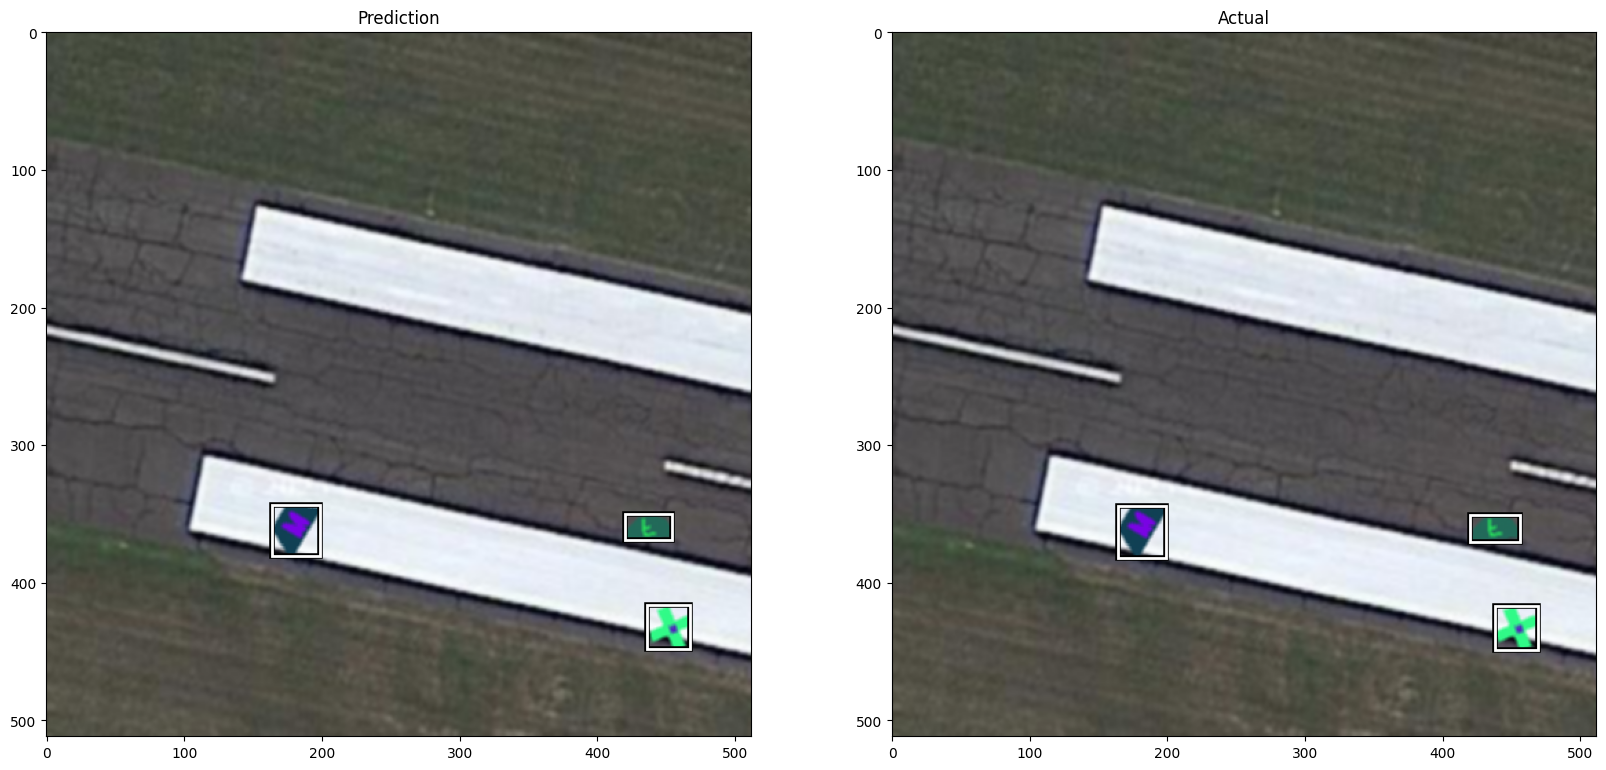

1 [0.9999852180480957, 0.9999830722808838, 0.9989633560180664, 0.9860814809799194, 0.9186782240867615] [12.0, 4.0, 2.0, 5.0, 9.0]


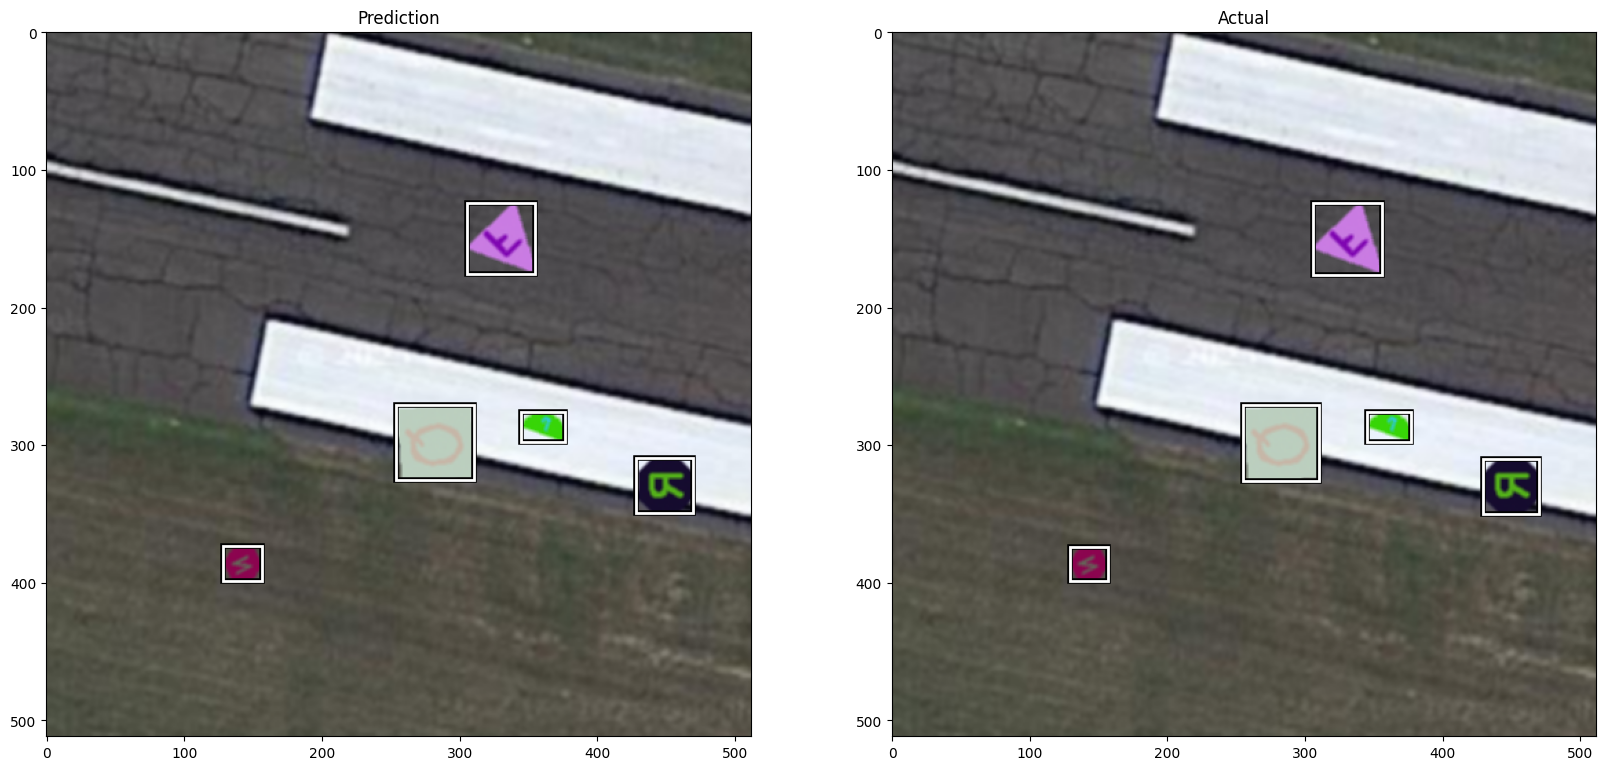

2 [] []


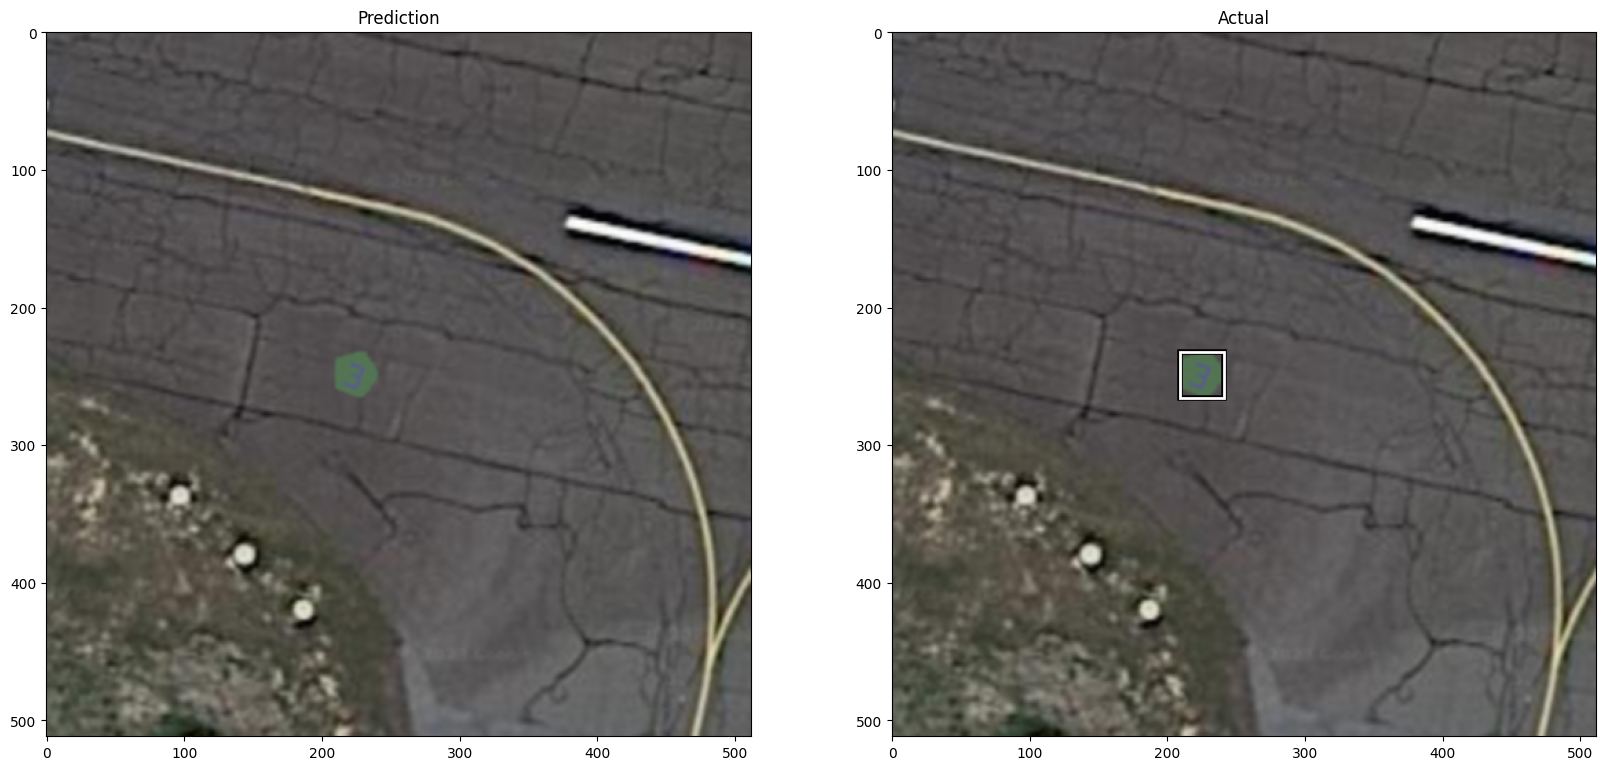

3 [0.9994015693664551] [5.0]


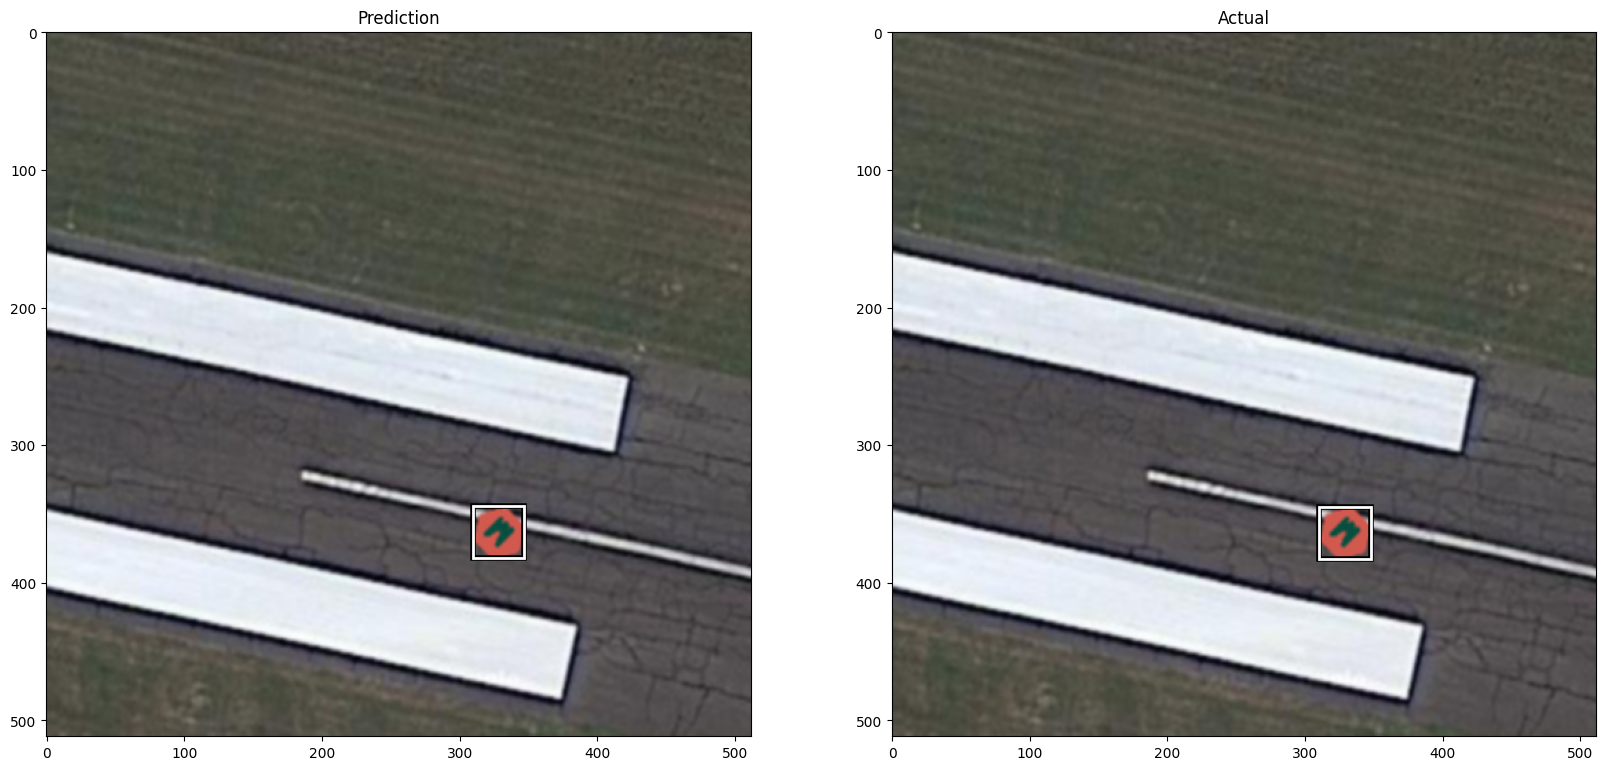

4 [0.9999196529388428, 0.9999004602432251, 0.9998255372047424, 0.9966781139373779, 0.993120551109314] [12.0, 6.0, 7.0, 5.0, 3.0]


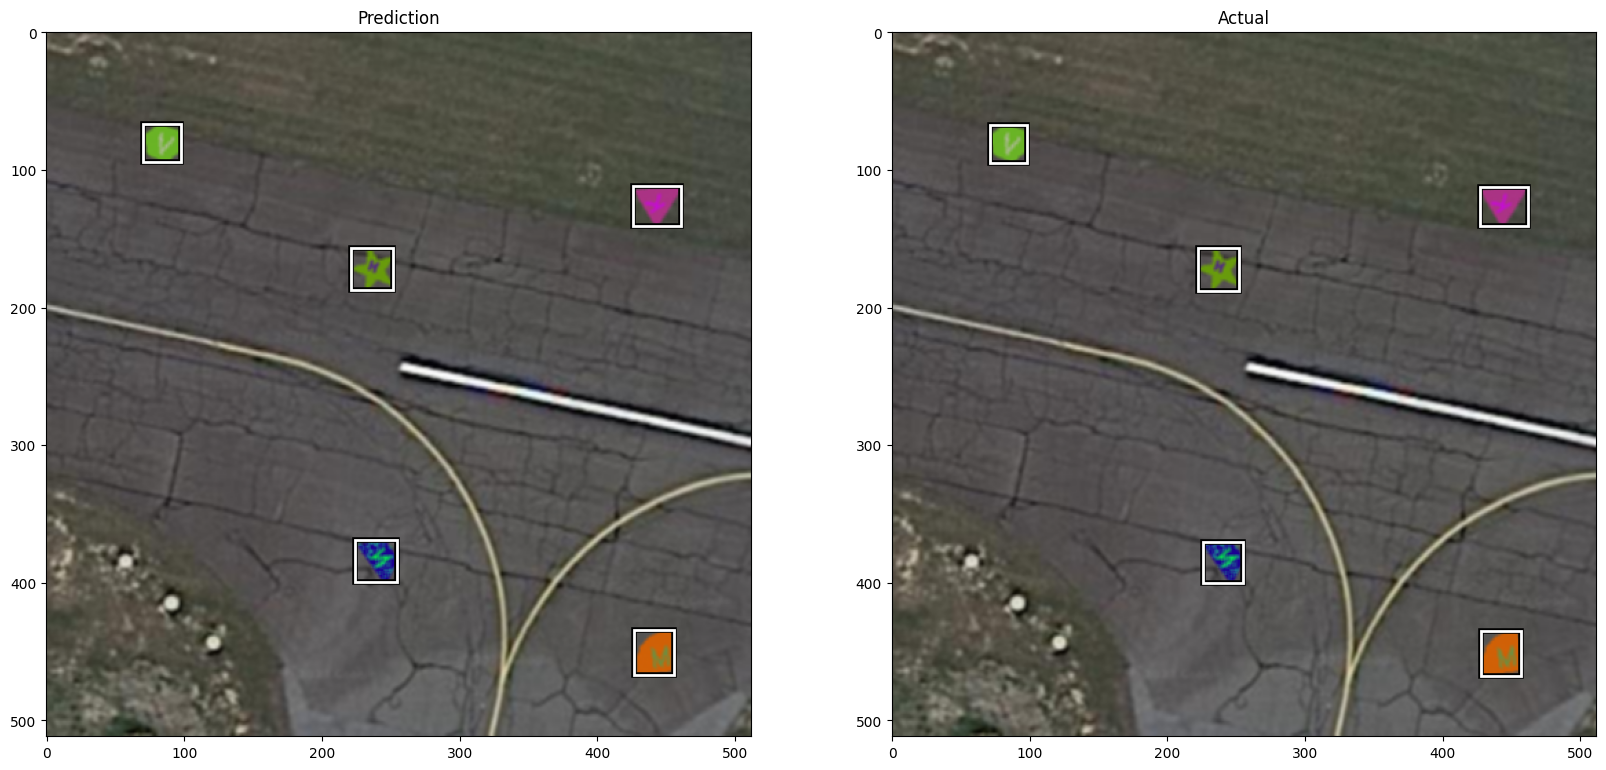

In [4]:
model = EfficientDetModel(
    num_classes=13,
    img_size=512,
    model_architecture="efficientnet_b0"
    )

model.load_state_dict(torch.load('efficientdet_b0_pytorch_50epoch'))
model.eval()
num_samples = 5#len(cars_train_ds.images)
img_labels_list = [cars_train_ds.get_image_and_labels_by_idx(i) for i in range(num_samples)]
images = [x[0] for x in img_labels_list]
predicted_bboxes, predicted_class_labels, predicted_class_confidences  = model.predict(images)
for i in range(num_samples):
    print(i, predicted_class_confidences[i], predicted_class_labels[i])
    image = images[i]
    truth_bboxes = img_labels_list[i][1]
    compare_bboxes_for_image(image, predicted_bboxes=predicted_bboxes[i], actual_bboxes=truth_bboxes.tolist())
